# Uso de modelos de Machine Learning supervisado para clasificación

Vamos a hacer uso de TF-IDF para poder transformar el texto y que este pueda ser usado por modelos IA no específicos para tratamiento de texto y así usar estos para la clasificación de fake news

In [2]:
import pandas as pd
import optuna
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC


df = pd.read_csv('datos_limpios_estandarizados.csv')

print("Valores nulos en 'title':", df["title"].isna().sum())
print("Valores nulos en 'text':", df["text"].isna().sum())

df[['title', 'text']] = df[['title', 'text']].fillna("")

print("Valores nulos en 'title':", df["title"].isna().sum())
print("Valores nulos en 'text':", df["text"].isna().sum())

Valores nulos en 'title': 2
Valores nulos en 'text': 0
Valores nulos en 'title': 0
Valores nulos en 'text': 0


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.49      0.53      0.51      1843
           1       0.47      0.43      0.45      1766

    accuracy                           0.48      3609
   macro avg       0.48      0.48      0.48      3609
weighted avg       0.48      0.48      0.48      3609



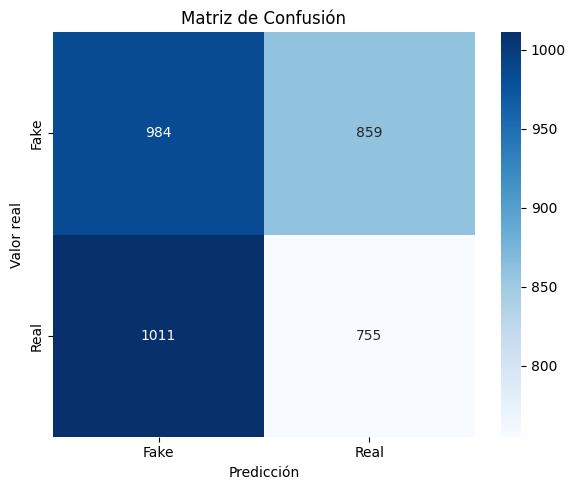

In [17]:
# Definir preprocesamiento  del texto
preprocessor = ColumnTransformer(
    transformers=[
        # Texto: TF-IDF (título y autor por separado)
        ("text", TfidfVectorizer(max_features=1000), "text"),
        ("title", TfidfVectorizer(max_features=200), "title"),
    ],
    remainder="passthrough"  # Mantener las columnas restantes sin cambios
)

# Pipeline completo: Preprocesamiento + Modelo
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier()),
])

# Entrenamiento
x = df.drop(columns=["label"])
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
pipeline.fit(X_train, y_train)

# Predicción
y_pred = pipeline.predict(X_test)
# Evaluación
cm = confusion_matrix(y_test, y_pred)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Etiquetas opcionales si tus clases no son solo 0 y 1
labels = ["Fake", "Real"]  # reemplázalo si usas otras clases

# Dibujar
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusión")
plt.tight_layout()
plt.show()

Ahora vamos a probar a usar un perceptrón multicapa a ver si este funciona mejor

Precisión del modelo: 0.52
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.51      0.55      0.53      1828
           1       0.49      0.45      0.47      1781

    accuracy                           0.50      3609
   macro avg       0.50      0.50      0.50      3609
weighted avg       0.50      0.50      0.50      3609



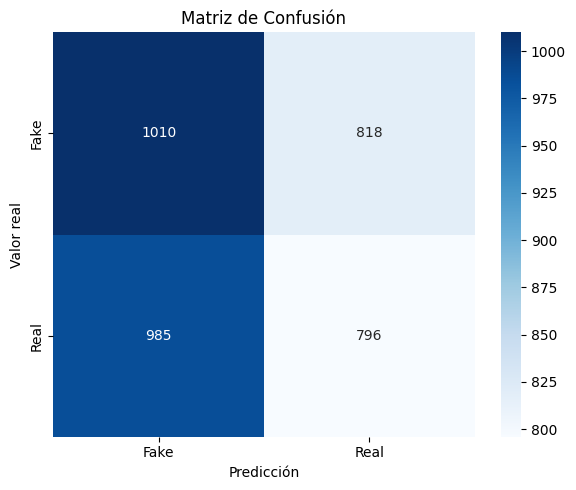

In [ ]:
df = pd.read_csv('datos_limpios_estandarizados.csv')

# Definir preprocesamiento  del texto
preprocessor = ColumnTransformer(
    transformers=[
        # Texto: TF-IDF (título y autor por separado)
        ("text", TfidfVectorizer(max_features=1000), "text"),
        ("title", TfidfVectorizer(max_features=200), "title"),
    ],
    remainder="passthrough"  # Mantener las columnas restantes sin cambios
)

# Pipeline completo: Preprocesamiento + Modelo
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", MLPClassifier(
        hidden_layer_sizes=(64, 32),  # 2 capas ocultas (64 y 32 neuronas)
        activation="relu",
        max_iter=1000,
        random_state=42,
    )),
])

# Entrenamiento
x = df.drop(columns=["label"])
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
pipeline.fit(X_train, y_train)

# Evaluación
accuracy = pipeline.score(X_test, y_test)
print(f"Precisión del modelo: {accuracy:.2f}")

# Evaluación
cm = confusion_matrix(y_test, y_pred)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Etiquetas opcionales si tus clases no son solo 0 y 1
labels = ["Fake", "Real"]  # reemplázalo si usas otras clases

# Dibujar
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusión")
plt.tight_layout()
plt.show()

Precisión del modelo: 0.50
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.52      0.56      0.54      1842
           1       0.50      0.45      0.47      1767

    accuracy                           0.51      3609
   macro avg       0.51      0.51      0.51      3609
weighted avg       0.51      0.51      0.51      3609



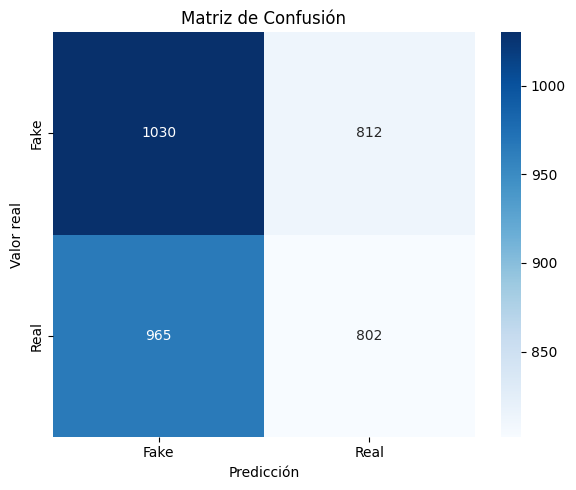

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        # Texto: TF-IDF (título y autor por separado)
        ("text", TfidfVectorizer(max_features=1000), "text"),
        ("title", TfidfVectorizer(max_features=200), "title"),
    ],
    remainder="passthrough"  # Mantener las columnas restantes sin cambios
)

# Pipeline completo: Preprocesamiento + Modelo
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LinearSVC()),
])

# Entrenamiento
x = df.drop(columns=["label"])
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
pipeline.fit(X_train, y_train)

# Evaluación
accuracy = pipeline.score(X_test, y_test)
print(f"Precisión del modelo: {accuracy:.2f}")

# Evaluación
cm = confusion_matrix(y_test, y_pred)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Etiquetas opcionales si tus clases no son solo 0 y 1
labels = ["Fake", "Real"]  # reemplázalo si usas otras clases

# Dibujar
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusión")
plt.tight_layout()
plt.show()

In [3]:
df.drop(columns=["year", "month", "day"], inplace=True)

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.52      0.57      0.54      1824
           1       0.51      0.46      0.49      1785

    accuracy                           0.52      3609
   macro avg       0.52      0.52      0.51      3609
weighted avg       0.52      0.52      0.51      3609



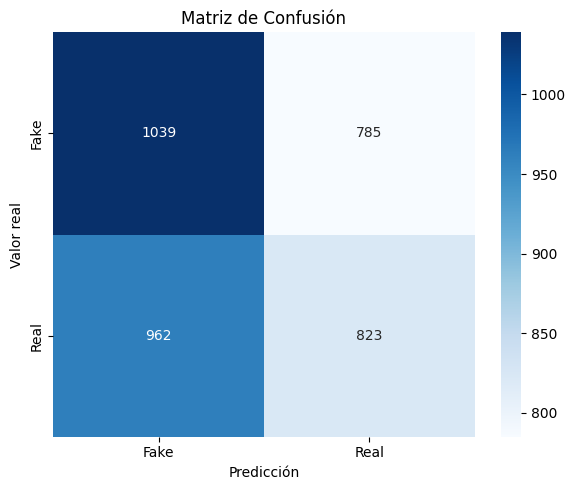

In [4]:
# Definir preprocesamiento  del texto
preprocessor = ColumnTransformer(
    transformers=[
        # Texto: TF-IDF (título y autor por separado)
        ("text", TfidfVectorizer(max_features=1000), "text"),
        ("title", TfidfVectorizer(max_features=200), "title"),
    ],
    remainder="passthrough"  # Mantener las columnas restantes sin cambios
)

# Pipeline completo: Preprocesamiento + Modelo
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier()),
])

# Entrenamiento
x = df.drop(columns=["label"])
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
pipeline.fit(X_train, y_train)

# Predicción
y_pred = pipeline.predict(X_test)
# Evaluación
cm = confusion_matrix(y_test, y_pred)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Etiquetas opcionales si tus clases no son solo 0 y 1
labels = ["Fake", "Real"]  # reemplázalo si usas otras clases

# Dibujar
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusión")
plt.tight_layout()
plt.show()

Precisión del modelo: 0.49
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.50      0.55      0.52      1829
           1       0.48      0.44      0.46      1780

    accuracy                           0.49      3609
   macro avg       0.49      0.49      0.49      3609
weighted avg       0.49      0.49      0.49      3609



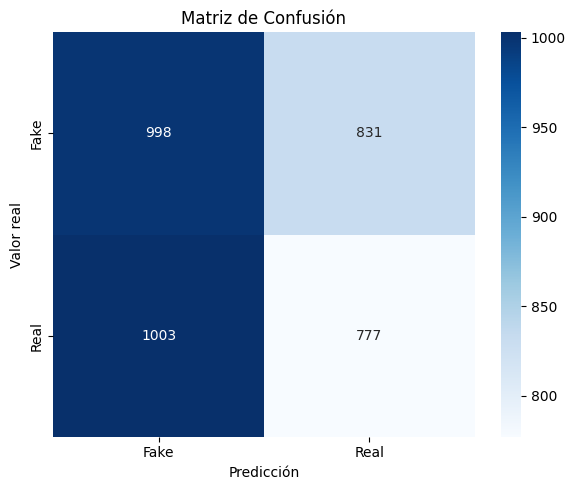

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        # Texto: TF-IDF (título y autor por separado)
        ("text", TfidfVectorizer(max_features=1000), "text"),
        ("title", TfidfVectorizer(max_features=200), "title"),
    ],
    remainder="passthrough"  # Mantener las columnas restantes sin cambios
)

# Pipeline completo: Preprocesamiento + Modelo
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LinearSVC()),
])

# Entrenamiento
x = df.drop(columns=["label"])
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
pipeline.fit(X_train, y_train)

# Evaluación
accuracy = pipeline.score(X_test, y_test)
print(f"Precisión del modelo: {accuracy:.2f}")

# Evaluación
cm = confusion_matrix(y_test, y_pred)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Etiquetas opcionales si tus clases no son solo 0 y 1
labels = ["Fake", "Real"]  # reemplázalo si usas otras clases

# Dibujar
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusión")
plt.tight_layout()
plt.show()

Vamos a usar optuna para poder probar varias combinaciones de parámetros para perceptrón multicapa para dar con cual de las combinaciones se comporta mejor la clasificación del dataset

In [3]:
# Entrenamiento
x = df.drop(columns=["label"])
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

def objective(test):
    solver = test.suggest_categorical(
        "solver", ['adam', 'lbfgs', 'sgd'])
    activation= test.suggest_categorical(
        "activation", ['tanh', 'identity', 'logistic', 'relu'])
    first_layer_n_neurons = test.suggest_int(
        'first_layer_n_neurons', 10, 100, step=5)
    second_layer_n_neurons = test.suggest_int(
        'second_layer_n_neurons', 10, 100, step=5)
    hidden_layer_sizes = (first_layer_n_neurons, second_layer_n_neurons)
    learning_rate = test.suggest_categorical(
        'learning_rate', ['constant', 'invscaling', 'adaptive'])
    
    preprocessor = ColumnTransformer(
    transformers=[
        # Texto: TF-IDF (título y autor por separado)
        ("text", TfidfVectorizer(max_features=1000), "text"),
        ("title", TfidfVectorizer(max_features=200), "title"),
    ],
    remainder="passthrough"  # Mantener las columnas restantes sin cambios
)

    # Pipeline completo: Preprocesamiento + Modelo
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", MLPClassifier(
        learning_rate=learning_rate,
        activation=activation,
        hidden_layer_sizes=hidden_layer_sizes,
        solver=solver,
        random_state=1234,
        max_iter=100)),
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    tp = len(X_test[(y_pred == 1) &( y_test == 1)])
    fn = len(X_test[(y_test == 0 ) & (y_pred != 0)])
    fp = len(X_test[(y_pred == 1) &( y_test == 0)])

    precision = 0 if (tp + fp) == 0 else tp / (tp + fp)
    recall = 0 if (tp + fn) == 0 else tp / (tp + fn)
    neuron_combinations = first_layer_n_neurons * second_layer_n_neurons

    return precision, recall, neuron_combinations

In [ ]:
study = optuna.create_study(directions=['maximize', 'maximize', 'minimize'])
study.optimize(objective, n_trials=100)

[I 2025-05-17 17:19:30,759] A new study created in memory with name: no-name-58ad5050-8f4f-4254-9cf8-a2dc518b22d6
[I 2025-05-17 17:20:06,535] Trial 0 finished with values: [0.5005567928730512, 0.5005567928730512, 6000.0] and parameters: {'solver': 'adam', 'activation': 'identity', 'first_layer_n_neurons': 100, 'second_layer_n_neurons': 60, 'learning_rate': 'invscaling'}.
[I 2025-05-17 17:20:19,315] Trial 1 finished with values: [0.4977900552486188, 0.4977900552486188, 2450.0] and parameters: {'solver': 'adam', 'activation': 'relu', 'first_layer_n_neurons': 35, 'second_layer_n_neurons': 70, 'learning_rate': 'adaptive'}.
[I 2025-05-17 17:20:48,349] Trial 2 finished with values: [0.0, 0.0, 5225.0] and parameters: {'solver': 'sgd', 'activation': 'logistic', 'first_layer_n_neurons': 95, 'second_layer_n_neurons': 55, 'learning_rate': 'adaptive'}.
[I 2025-05-17 17:20:53,814] Trial 3 finished with values: [0.0, 0.0, 2600.0] and parameters: {'solver': 'sgd', 'activation': 'logistic', 'first_lay

RuntimeError: A single best trial cannot be retrieved from a multi-objective study. Consider using Study.best_trials to retrieve a list containing the best trials.

In [7]:
study.best_trials

[FrozenTrial(number=13, state=1, values=[0.5134408602150538, 0.5134408602150538, 700.0], datetime_start=datetime.datetime(2025, 5, 17, 17, 24, 9, 736007), datetime_complete=datetime.datetime(2025, 5, 17, 17, 24, 26, 146185), params={'solver': 'lbfgs', 'activation': 'relu', 'first_layer_n_neurons': 20, 'second_layer_n_neurons': 35, 'learning_rate': 'invscaling'}, user_attrs={}, system_attrs={'NSGAIISampler:generation': 0}, intermediate_values={}, distributions={'solver': CategoricalDistribution(choices=('adam', 'lbfgs', 'sgd')), 'activation': CategoricalDistribution(choices=('tanh', 'identity', 'logistic', 'relu')), 'first_layer_n_neurons': IntDistribution(high=100, log=False, low=10, step=5), 'second_layer_n_neurons': IntDistribution(high=100, log=False, low=10, step=5), 'learning_rate': CategoricalDistribution(choices=('constant', 'invscaling', 'adaptive'))}, trial_id=13, value=None),
 FrozenTrial(number=34, state=1, values=[0.5091093117408907, 0.5091093117408907, 250.0], datetime_sta